# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
load_dotenv()
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [5]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [6]:
type(api_key)

str

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
type(newsapi)

newsapi.newsapi_client.NewsApiClient

In [9]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en")
btc_headlines

{'status': 'ok',
 'totalResults': 9150,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment',
   'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…',
   'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a',
   'publishedAt': '2021-02-08T14:01:09Z',
   'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'},
  {'source': {'id': 'the-verge', 'name': 'T

In [10]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en")
eth_headlines

{'status': 'ok',
 'totalResults': 1832,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
   'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
   'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
   'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
   'publishedAt': '2021-02-18T16:16:57Z',
   'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple 

In [11]:
# Print total articles
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

Total articles about Bitcoin: 9150
Total articles about Ethereum: 1832


In [12]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({

            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
btc_df = btc_df[cols]

btc_df.head(20)

,compound,negative,neutral,positive,text
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i..."
5,0.1779,0.032,0.916,0.051,When Bitcoin first appeared out of digital thi...
6,0.0000,0.000,1.000,0.000,TL;DR: The Bitcoin and Cryptocurrency Mastery ...
7,0.0000,0.000,1.000,0.000,"LiveUpdated Feb. 9, 2021, 8:01 a.m. ET\r\nFeb...."
8,0.7041,0.000,0.860,0.140,"Bitcoin is the future, again: this morning, it..."
9,-0.1280,0.082,0.852,0.066,Jack Dorsey and Jay Z create a bitcoin endowme...


In [13]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({

            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
eth_df = eth_df[cols]

eth_df.head(20)

,compound,negative,neutral,positive,text
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...
4,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...
5,0.7096,0.000,0.856,0.144,Attempting to get ahead of cryptocurrency mine...
6,0.4939,0.000,0.873,0.127,"By Reuters Staff\r\nSINGAPORE, Feb 9 (Reuters)..."
7,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: The logo of th...
8,0.5719,0.000,0.861,0.139,"NEW YORK (Reuters) - Ethereum, the second larg..."
9,0.5719,0.000,0.865,0.135,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec..."


In [14]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.199928,0.019056,0.908778,0.072111
std,0.376340,0.035630,0.081887,0.086707
min,-0.503700,0.000000,0.647000,0.000000
25%,0.000000,0.000000,0.868750,0.000000
50%,0.177900,0.000000,0.919500,0.053500
75%,0.411575,0.024000,0.957250,0.098500
max,0.921700,0.114000,1.000000,0.353000


In [15]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.189495,0.005950,0.942750,0.051300
std,0.274088,0.026609,0.062097,0.054785
min,-0.340000,0.000000,0.818000,0.000000
25%,0.000000,0.000000,0.900000,0.000000
50%,0.012900,0.000000,0.949500,0.046500
75%,0.365100,0.000000,1.000000,0.082000
max,0.709600,0.119000,1.000000,0.144000


### Questions:

Q: Which coin had the highest mean positive score?

A:  Bitcoin had tthe highest mean positive score at .0721

Q: Which coin had the highest compound score?

A: Bitcoin had tthe highest compound score at .9217

Q. Which coin had the highest positive score?

A:  Bitcoin had tthe highest positive score at .1440

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Expand the default stopwords list if necessary
sw_addon = {'has', 'have', 'had'}

In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words 
    # Remove the punctuation
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens


In [19]:
# Create a new tokens column for bitcoin
btc_tokens = btc_df.copy()

In [20]:
tokenized = []
for x in btc_tokens['text']:
    tokenized_articles = tokenizer(x)
    tokenized.append({'tokens':tokenized_articles})

In [21]:
tokens_df = pd.DataFrame(tokenized)
btc_tokens['tokens_text'] = tokens_df
btc_tokens.head()

,compound,negative,neutral,positive,text,tokens_text
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, ha, acq..."


In [22]:
# Create a new tokens column for ethereum
eth_tokens = eth_df.copy()

In [23]:
tokenized_eth = []
for x in eth_tokens['text']:
    tokenized_articles = tokenizer(x)
    tokenized.append({'tokens':tokenized_articles})

In [24]:
eth_tokens_df = pd.DataFrame(tokenized)
eth_tokens['tokens_text'] = eth_tokens_df
eth_tokens.head()

,compound,negative,neutral,positive,text,tokens_text
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...,"[tesla, led, elon, musk, confirmed, purchased,..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[brief, moment, sunday, tesla, said, invested,..."
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...,"[today, sec, filing, tesla, disclosed, ha, acq..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [47]:
from collections import Counter
from nltk import ngrams

In [48]:
btc_words = []
for text in btc_tokens['tokens_text']:
    for word in text:
        btc_words.append(word)

In [49]:
eth_words = []
for text in eth_tokens['tokens_text']:
    for word in text:
        eth_words.append(word)

In [50]:
btc_sentiment = []
for sentiment in btc_tokens['text']:
    sentiment_list = sentiment
    btc_sentiment.append(sentiment_list)

In [51]:
eth_sentiment = []
for sentiment in eth_tokens['text']:
    sentiment_list_eth = sentiment
    eth_sentiment.append(sentiment_list_eth)

In [52]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    
    return pd.DataFrame(list(top_10.items()), columns=['Bigram', 'Count'])

In [53]:
# Generate the Bitcoin N-grams where N=2
bigram_counter(btc_sentiment)

,Bigram,Count
0,"(billion, bitcoin)",3
1,"(elon, musks)",2
2,"(elon, musk)",2
3,"(jack, dorsey)",2
4,"(jay, z)",2
5,"(popular, cryptocurrency)",2
6,"(bitcoin, future)",2
7,"(char, bitcoin)",2
8,"(alltime, high)",2
9,"(musks, cryptocurrency)",1


In [54]:
# Generate the Ethereum N-grams where N=2
bigram_counter(eth_sentiment)

,Bigram,Count
0,"(record, high)",6
1,"(char, reuters)",5
2,"(feb, reuters)",5
3,"(char, new)",4
4,"(new, york)",4
5,"(photo, representation)",3
6,"(representation, ethereum)",3
7,"(ethereum, virtual)",3
8,"(virtual, currency)",3
9,"(currency, standing)",3


In [56]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Counter_words = dict(Counter(tokens).most_common(N))
    return Counter(tokens).most_common(N)

In [57]:
# Get the top 10 words for Bitcoin
token_count(btc_words)

[('char', 18),
 ('bitcoin', 12),
 ('cryptocurrency', 8),
 ('tesla', 6),
 ('elon', 4),
 ('wa', 4),
 ('billion', 4),
 ('said', 4),
 ('ha', 4),
 ('company', 4)]

In [58]:
# Get the top 10 words for Ethereum
token_count(eth_words)

[('char', 20),
 ('bitcoin', 12),
 ('cryptocurrency', 10),
 ('tesla', 6),
 ('wa', 5),
 ('ha', 5),
 ('company', 5),
 ('elon', 4),
 ('billion', 4),
 ('said', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [60]:
def combined_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

In [62]:
btc_words = combined_text(btc_words)

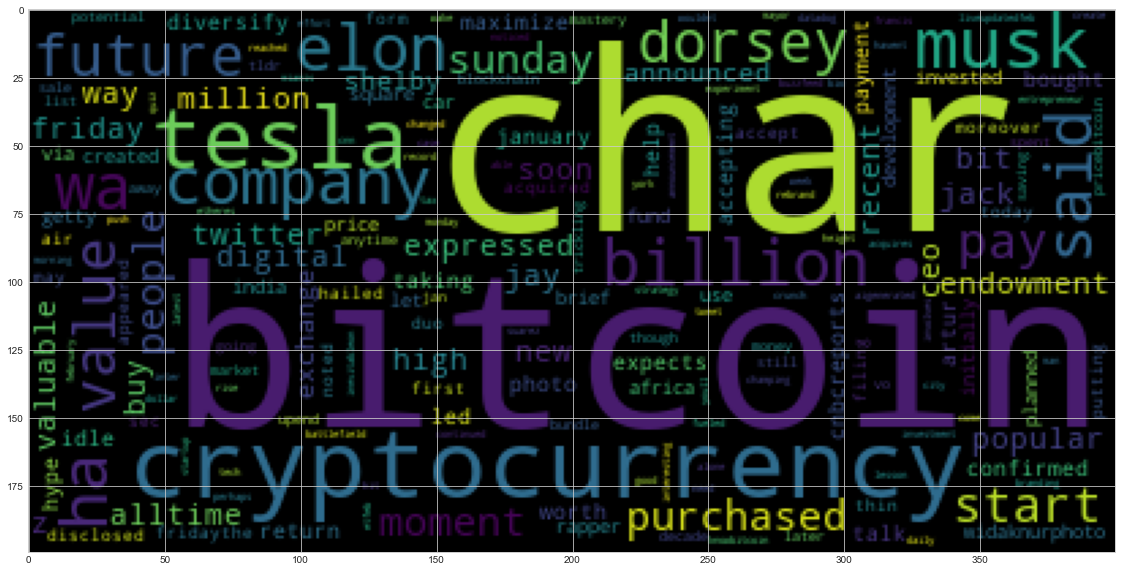

In [65]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(btc_words)
plt.imshow(wc)

In [66]:
eth_words = combined_text(eth_words)

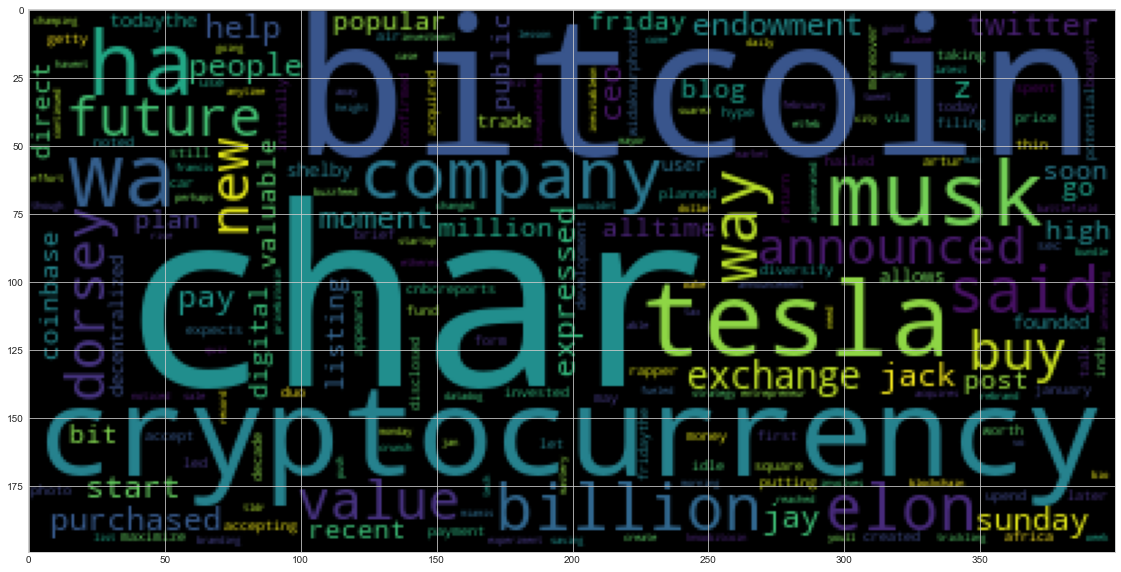

In [67]:
wc = WordCloud(collocations=False).generate(eth_words)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [68]:
import spacy
from spacy import displacy

In [69]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [70]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [75]:
# Run the NER processor on all of the text
btc_sent = []
for sentiment in btc_tokens['text']:
    sent_list = sent
    btc_sent.append(sent_list)
    
# Concatenate all of the bitcoin text together 
string_bitcoin = ' '.join(btc_sent)

In [76]:
string_bitcoin

'By Reuters Staff\r\nSINGAPORE, Feb 15 (Reuters) - Cryptocurrencies slid during Asian trading hours on Monday, with bitcoin dropping more than 5%, as investors took profits from a record-breaking rally.… [+253 chars] By Reuters Staff\r\nSINGAPORE, Feb 15 (Reuters) - Cryptocurrencies slid during Asian trading hours on Monday, with bitcoin dropping more than 5%, as investors took profits from a record-breaking rally.… [+253 chars] By Reuters Staff\r\nSINGAPORE, Feb 15 (Reuters) - Cryptocurrencies slid during Asian trading hours on Monday, with bitcoin dropping more than 5%, as investors took profits from a record-breaking rally.… [+253 chars] By Reuters Staff\r\nSINGAPORE, Feb 15 (Reuters) - Cryptocurrencies slid during Asian trading hours on Monday, with bitcoin dropping more than 5%, as investors took profits from a record-breaking rally.… [+253 chars] By Reuters Staff\r\nSINGAPORE, Feb 15 (Reuters) - Cryptocurrencies slid during Asian trading hours on Monday, with bitcoin dropping mor

In [73]:
# Render the visualization
# Add a title to the document
bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin Name Entity Recognition'
displacy.render(bitcoin_doc, style='ent')

In [77]:
# List all Entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP

---

## Ethereum NER

In [78]:
# Concatenate all of the bitcoin text together
eth_sentiment = []
for sentiment in eth_tokens['text']:
    sent_list_eth = sentiment
    eth_sentiment.append(sent_list_eth)
    
string_eth = " ".join(eth_sentiment)

In [79]:
string_eth 

"Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.\r\nThe cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - E… [+472 chars] By Reuters Staff\r\nFILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration/Fi… [+1379 chars] While the first Christie's auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most not

In [80]:
# Run the NER processor on all of the text
# Add a title to the document
eth_doc = nlp(string_eth)
eth_doc.user_data['title'] = 'Ethereum Named Entity Recogition'
displacy.render(eth_doc, style='ent')


In [81]:
# List all Entities
for ent in eth_doc.ents:
    print (ent, ent.label_)

GeForce ORG
3060 GPE
GPU ORG
today DATE
2012 DATE
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Friday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
$0.054496
 MONEY
NEW YORK GPE
Reuters ORG
$245 million MONEY
last